# Building a model

In this notebook I will test various machine learning models to find one that gives the best results in predicting the churn.

### Load libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np

### Load data

In [7]:
dataset = pd.read_csv('../data/transformed.csv', index_col='customerID')

Description of the features:
* Gender: The customer’s gender: Male, Female
* Senior Citizen: Indicates if the customer is 65 or older: Yes, No
* Partner: Indicates if the customer is a partner: Yes, No
* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
* Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service
* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service
* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year
* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* Tenure Buckets: Indicates the range in which the customer's tenure value is, it is denoted in months: 0-20, 21-50, 50+
* Monthly Charges Buckets: Indicates a range in which the customer’s current total monthly charge is for all their services from the company: 0-40, 41-60, 60+
* Multiple Lines Buckets: Indicates if the customer subscribes to multiple telephone lines with the company: Yes; either has one line or not at all: Other
* Num Internet Services: Indicates the total number of additional internet services the customer has: 0 - 6
* Churn: Indicates if the customer have churned: Yes, No

In [8]:
dataset.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TenureBuckets,MonthlyChargesBuckets,MultipleLinesBuckets,NumInternetlServices,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0-20,0-40,Other,1,No
5575-GNVDE,Male,No,No,No,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,21-50,41-60,Other,2,No
3668-QPYBK,Male,No,No,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0-20,41-60,Other,2,Yes
7795-CFOCW,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),21-50,41-60,Other,3,No
9237-HQITU,Female,No,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0-20,60+,Other,0,Yes


In [9]:
dataset.shape

(7043, 20)

In [11]:
data = dataset.sample(frac=0.9, random_state=45)
data_validation = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_validation.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Final Validation ' + str(data_validation.shape))

Data for Modeling: (6339, 20)
Unseen Data For Final Validation (704, 20)


### Building a model

To quickly iterate through various models i will use the [PyCaret](https://pycaret.org) library. It is an open-source, low-code machine learning library in Python that automates machine learning workflows.

The kind of a model that suits our case is a binary classification model.

In [12]:
from pycaret.classification import *

Initialize the training environment and create the transformation pipeline.

In [36]:
setup(
    data, 
    target='Churn',
    n_jobs=5,
    train_size=0.8,
    silent=True,
    numeric_features=['NumInternetlServices'],
    normalize=True,
    fix_imbalance=True,
);

,Description,Value
0,session_id,4331
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(6339, 20)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


Compare various models.

In [37]:
compare_models(include=['lr', 'knn', 'dt', 'svm', 'ridge'], fold=5);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7545,0.8437,0.7847,0.5161,0.6227,0.4519,0.4738,0.0260
ridge,Ridge Classifier,0.7486,0.0000,0.7954,0.5087,0.6204,0.4458,0.4708,0.0160
svm,SVM - Linear Kernel,0.7326,0.0000,0.8053,0.4913,0.6082,0.4236,0.4561,0.0280
dt,Decision Tree Classifier,0.7194,0.6727,0.4802,0.4588,0.4689,0.2785,0.2788,0.0220
knn,K Neighbors Classifier,0.6985,0.7576,0.7031,0.4471,0.5465,0.3371,0.3566,0.0880


All the models give similar results.

### Tune the model

**Linear regression**

In [38]:
lr = create_model('lr');

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7539,0.8533,0.8397,0.5140,0.6377,0.4672,0.4995
1,0.7239,0.8177,0.7328,0.4776,0.5783,0.3863,0.4059
2,0.7574,0.8643,0.8092,0.5196,0.6328,0.4642,0.4897
3,0.7692,0.8501,0.8168,0.5350,0.6465,0.4860,0.5100
4,0.7199,0.8194,0.7252,0.4726,0.5723,0.3775,0.3967
5,0.7456,0.8295,0.7405,0.5052,0.6006,0.4235,0.4402
6,0.7396,0.8430,0.7557,0.4975,0.6000,0.4189,0.4391
7,0.7535,0.8638,0.8092,0.5146,0.6291,0.4578,0.4841
8,0.7613,0.8396,0.7939,0.5253,0.6322,0.4662,0.4880
9,0.7633,0.8586,0.8168,0.5271,0.6407,0.4762,0.5016


In [ ]:
%time tuned_lr = tune_model(lr, n_iter=1000, optimize='recall')
# Wall time: 2min 54s

In [41]:
tuned_lr

LogisticRegression(C=0.204, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4331, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7437,0.8341,0.7748,0.5453,0.6401,0.4503,0.4670


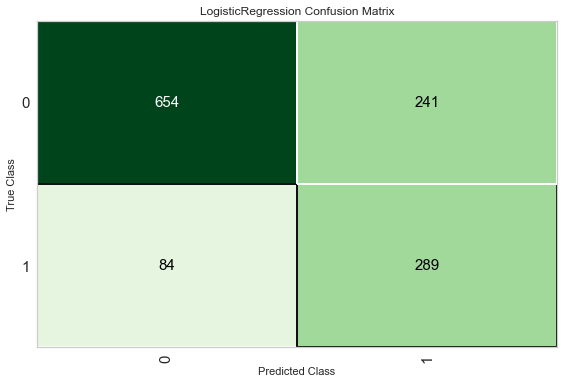

In [43]:
plot_model(tuned_lr, plot = 'confusion_matrix')

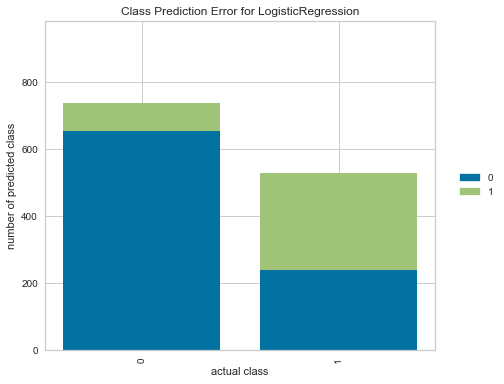

In [44]:
plot_model(tuned_lr, plot = 'error')

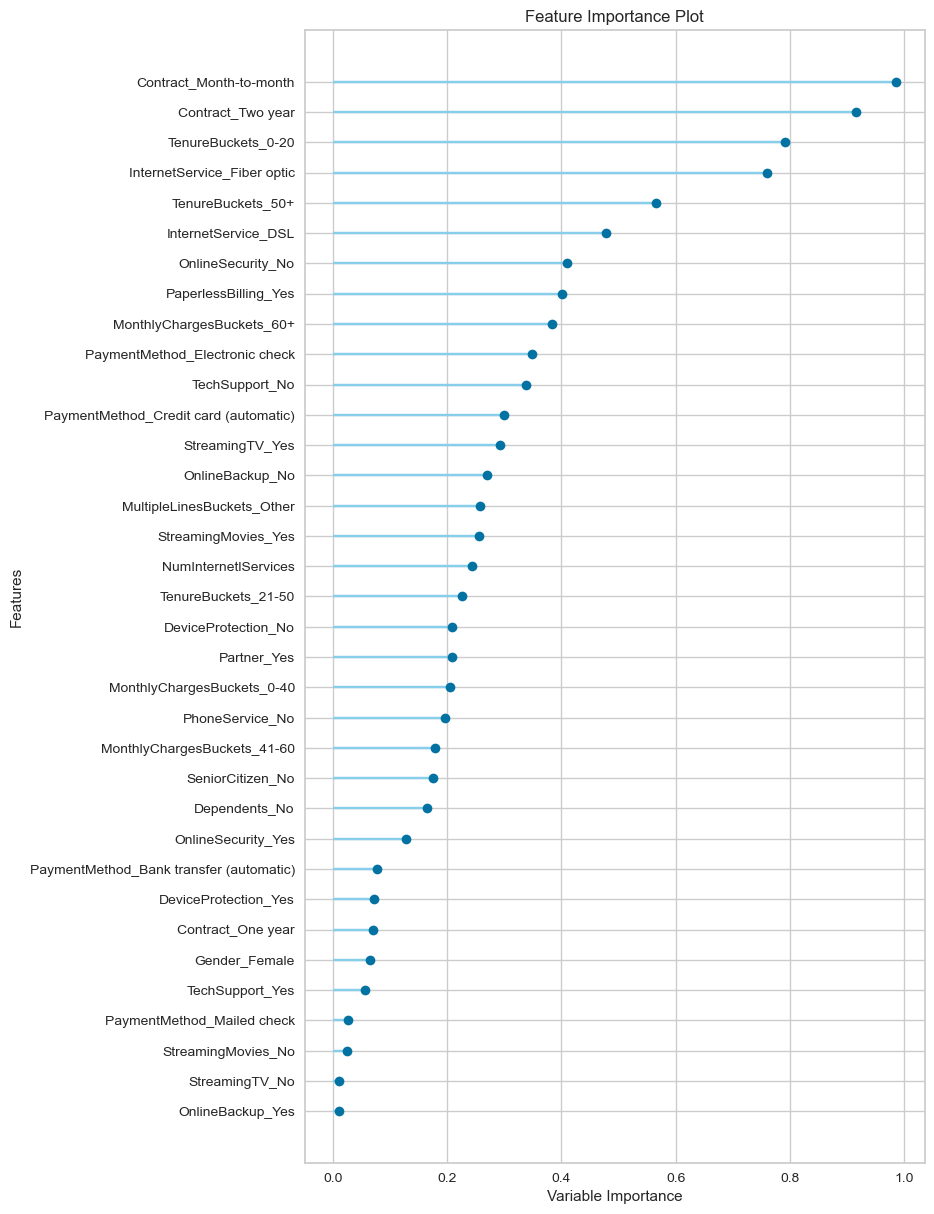

In [45]:
plot_model(tuned_lr, plot = 'feature_all')

**Ridge**

In [48]:
ridge = create_model('ridge');

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7539,0.0000,0.8550,0.5138,0.6418,0.4716,0.5071
1,0.7199,0.0000,0.7252,0.4726,0.5723,0.3775,0.3967
2,0.7791,0.0000,0.8550,0.5463,0.6667,0.5132,0.5420
3,0.7613,0.0000,0.8092,0.5248,0.6366,0.4707,0.4952
4,0.7199,0.0000,0.7481,0.4734,0.5799,0.3854,0.4081
5,0.7495,0.0000,0.7557,0.5103,0.6092,0.4349,0.4531
6,0.7416,0.0000,0.7710,0.5000,0.6066,0.4270,0.4492
7,0.7554,0.0000,0.8397,0.5164,0.6395,0.4699,0.5018
8,0.7554,0.0000,0.7939,0.5174,0.6265,0.4565,0.4796
9,0.7475,0.0000,0.8321,0.5070,0.6301,0.4551,0.4873


In [ ]:
%time tuned_ridge = tune_model(ridge, n_iter=1000, optimize='recall')
# Wall time: 1min 55s

In [50]:
tuned_ridge

RidgeClassifier(alpha=0.03, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=4331, solver='auto',
                tol=0.001)

In [51]:
predict_model(tuned_ridge);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7382,0.7543,0.7936,0.5372,0.6407,0.4465,0.4676


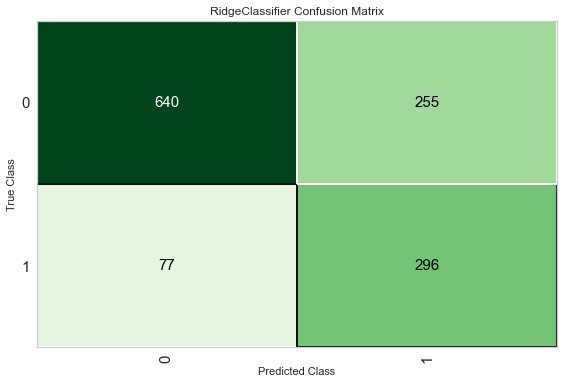

In [52]:
plot_model(tuned_ridge, plot = 'confusion_matrix')

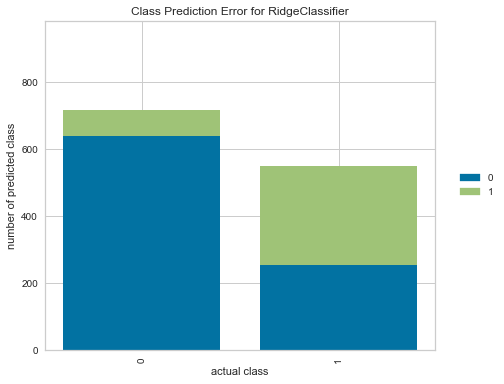

In [53]:
plot_model(tuned_ridge, plot = 'error')

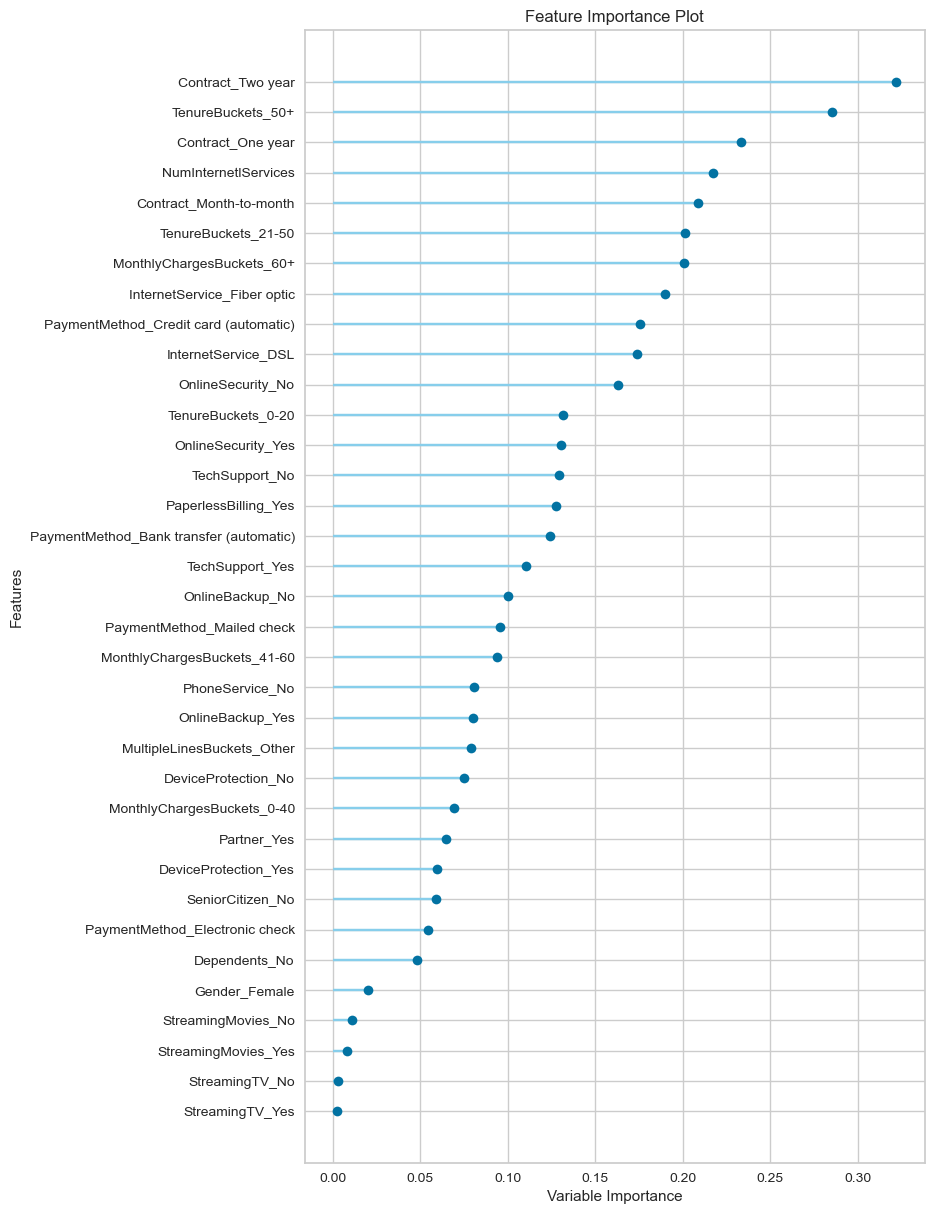

In [54]:
plot_model(tuned_ridge, plot = 'feature_all')

**SVM**

In [55]:
svm = create_model('svm');

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8012,0.0000,0.6870,0.6000,0.6406,0.5040,0.5062
1,0.7199,0.0000,0.7328,0.4729,0.5749,0.3802,0.4005
2,0.7594,0.0000,0.8092,0.5222,0.6347,0.4675,0.4924
3,0.7751,0.0000,0.7481,0.5475,0.6323,0.4759,0.4879
4,0.7475,0.0000,0.7405,0.5079,0.6025,0.4268,0.4431
5,0.7199,0.0000,0.8244,0.4758,0.6034,0.4100,0.4471
6,0.7732,0.0000,0.6641,0.5506,0.6021,0.4454,0.4492
7,0.7436,0.0000,0.8931,0.5021,0.6429,0.4663,0.5135
8,0.7239,0.0000,0.8931,0.4815,0.6257,0.4365,0.4890
9,0.7199,0.0000,0.8702,0.4770,0.6162,0.4239,0.4716


In [ ]:
%time tuned_svm = tune_model(svm, n_iter=1000, optimize='f1')
# Wall time: 3min 43s

In [63]:
tuned_svm

SGDClassifier(alpha=0.0005, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.9500000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=5, penalty='elasticnet',
              power_t=0.5, random_state=4331, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
predict_model(tuned_svm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.7311,0.7556,0.8150,0.5278,0.6407,0.4411,0.4677


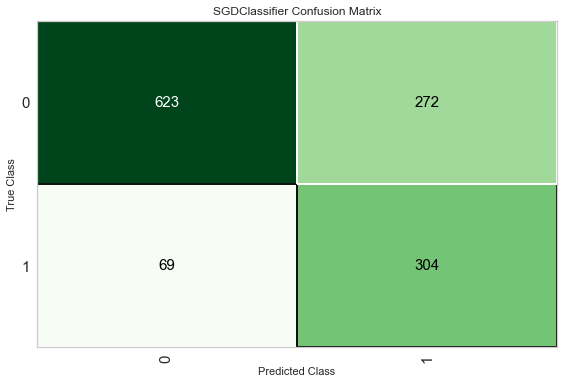

In [65]:
plot_model(tuned_svm, plot = 'confusion_matrix')

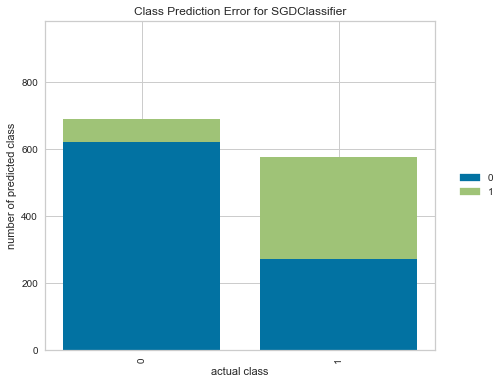

In [66]:
plot_model(tuned_svm, plot = 'error')

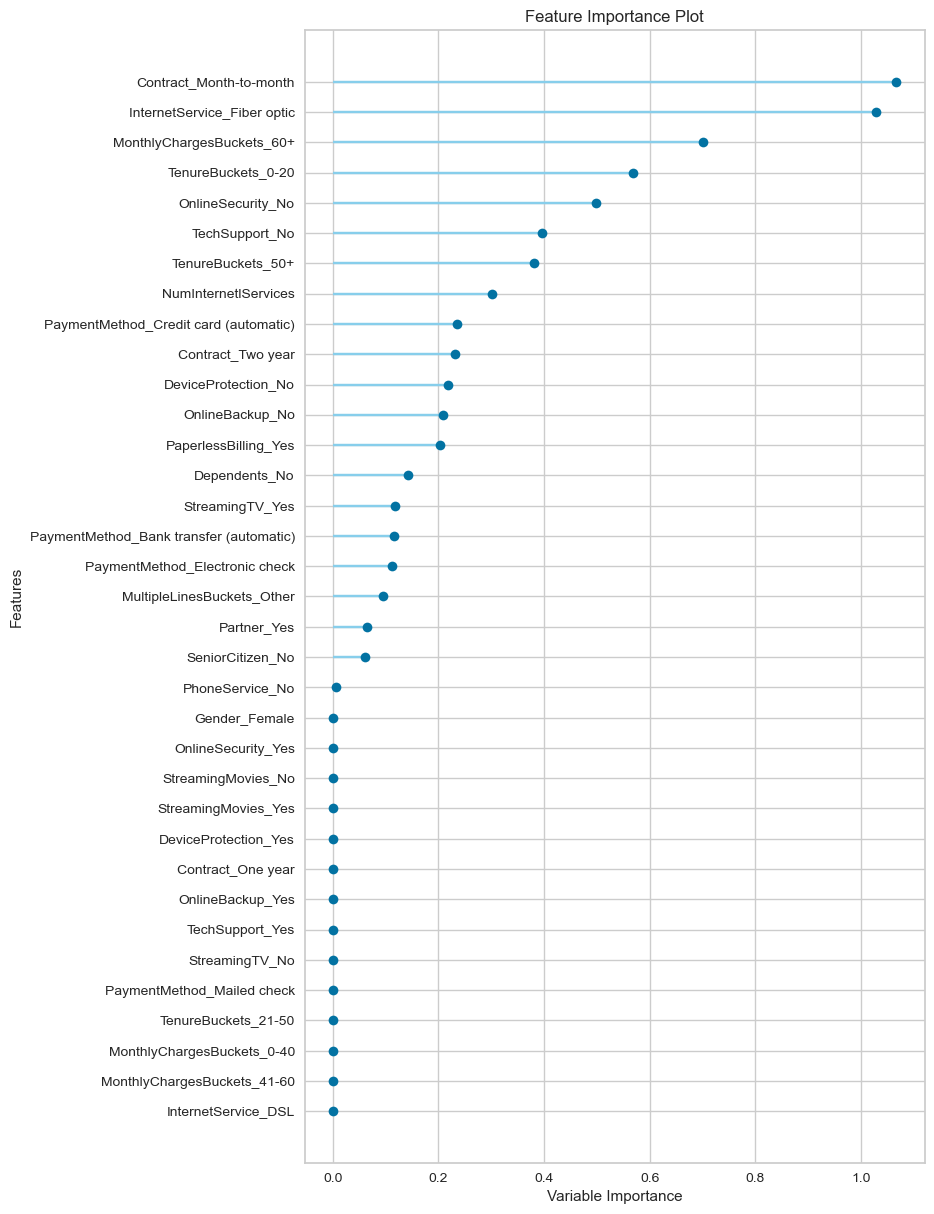

In [67]:
plot_model(tuned_svm, plot = 'feature_all')

**Decision tree**

In [75]:
dt = create_model('dt');

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7205,0.6725,0.5115,0.4621,0.4855,0.2943,0.2950
1,0.7160,0.6528,0.4580,0.4511,0.4545,0.2626,0.2626
2,0.7219,0.6735,0.4733,0.4627,0.4679,0.2797,0.2797
3,0.7456,0.6908,0.4427,0.5088,0.4735,0.3068,0.3081
4,0.7160,0.6407,0.4427,0.4496,0.4462,0.2552,0.2552
5,0.6982,0.6238,0.4198,0.4167,0.4183,0.2145,0.2145
6,0.7673,0.7353,0.5573,0.5489,0.5530,0.3957,0.3957
7,0.7239,0.6950,0.4427,0.4640,0.4531,0.2686,0.2687
8,0.7258,0.6671,0.4504,0.4683,0.4591,0.2756,0.2757
9,0.7475,0.7331,0.5802,0.5101,0.5429,0.3695,0.3709


In [ ]:
%time tuned_dt = tune_model(dt, n_iter=1000, optimize='f1')
# Wall time: 2min 3s

In [77]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4331, splitter='best')

In [82]:
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7169,0.7909,0.6836,0.5141,0.5869,0.3780,0.3869


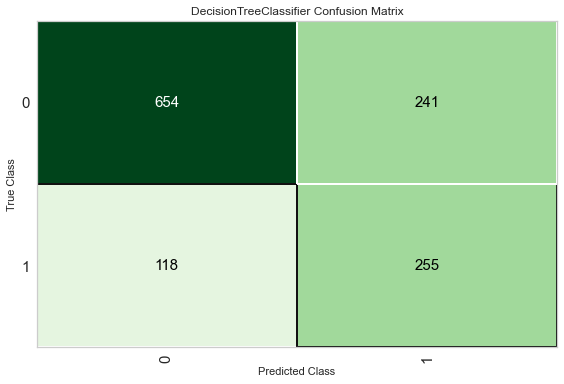

In [79]:
plot_model(tuned_dt, plot = 'confusion_matrix')

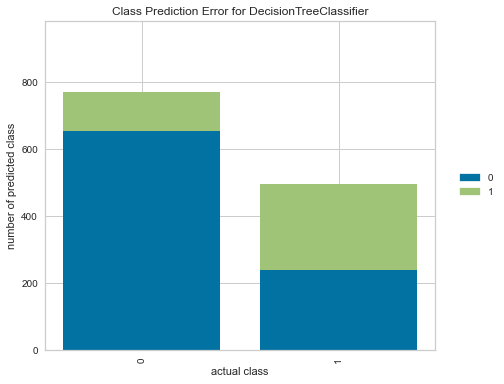

In [80]:
plot_model(tuned_dt, plot = 'error')

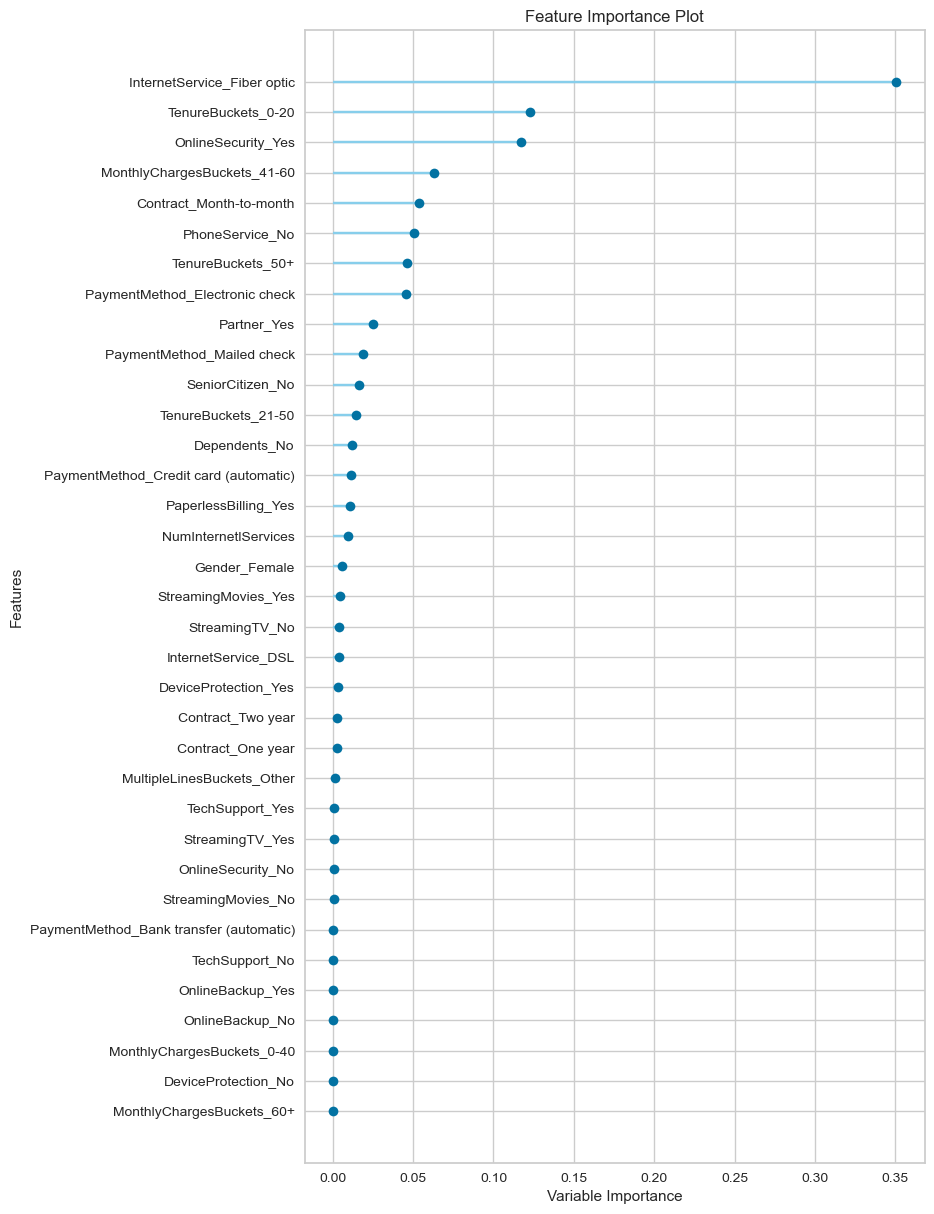

In [83]:
plot_model(tuned_dt, plot = 'feature_all')